<a href="https://colab.research.google.com/github/jssart99/M-S-2020-2/blob/master/Mod_y_Sim_IMLCE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# **Implementación del mapa logístico con un circuito electrónico**

Resumen

Se presenta la definición de un mapa logístico y algunos de los campos donde estos se usan y algunos lugares donde se pueden observar comportamientos que pueden ser descritos con estos. Una de los formas de ver el comportamiento descrito por un mapa logístico, es con el uso de circuitos electrónicos y de la electrónica análoga.

1.Introducción

A partir del descubrimiento del caos determinista (teoría del caos) en los años 60, usado en el estudio de ciertos sistemas dinámicos no lineales. Estos sistemas no lineales tienen usos en diferentes campos como biofísica, ingeniería en general, meteorología, etc. Se ha mostrado interés en la construcción de circuitos simples que muestren bifurcaciones y caos en sus comportamientos. Estos circuitos no sólo son simples de implementar sino que también han sido buenos modelos de ingeniería para sus respectivos sistemas matemáticos.

Y ¿Qué tienen en común un grifo que gotea, la población de un grupo de conejos o algunos comportamientos que se encuentran en la naturaleza? Lo que tienen en común es la siguiente ecuación 

$ x_{n+1}=\lambda x_n(1-x_n)$, 

esta ecuación describe un mapa logístico y es conocida como ecuación logística. Uno de los usos más sencillos de esta ecuación, es el del modelado de una población donde el término $(1-x_n)$ restringe el crecimiento de la población y evita que "crezca" de forma exponencial donde $x_n$ toma un valor entre $0$ y $1$ que sería un valor porcentual de la población actual y $\lambda$ es el parámetro de control que toma un valor de acuero a las restricciones del ambiente (alimento, depredadores, natalidad, mortalidad, etc.).

Al graficar $x_{n+1}$ vs $x_n$ (tomando $\lambda=1$) se obtiene una parábola invertida, convirtiendo a esta ecuación en una de las más sencillas donde se obtiene una retroalimentación negativa, significando que en el caso de hablar del crecimiento de una población, mientras más grande sea la población este año $(x_n)$, más pequeña será el año siguiente $(x_{n+1})$.


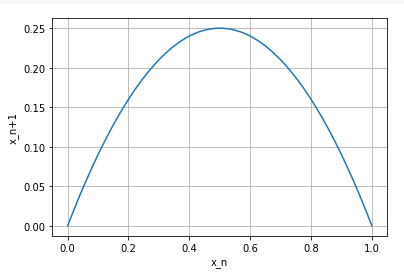

Continuando con el ejemplo del crecimiento poblacional, en las siguientes gráficas se observa qué sucede cuando se cambia el valor inicial de la población $(x_n)$ manteniendo el parámetro $\lambda$ constante.

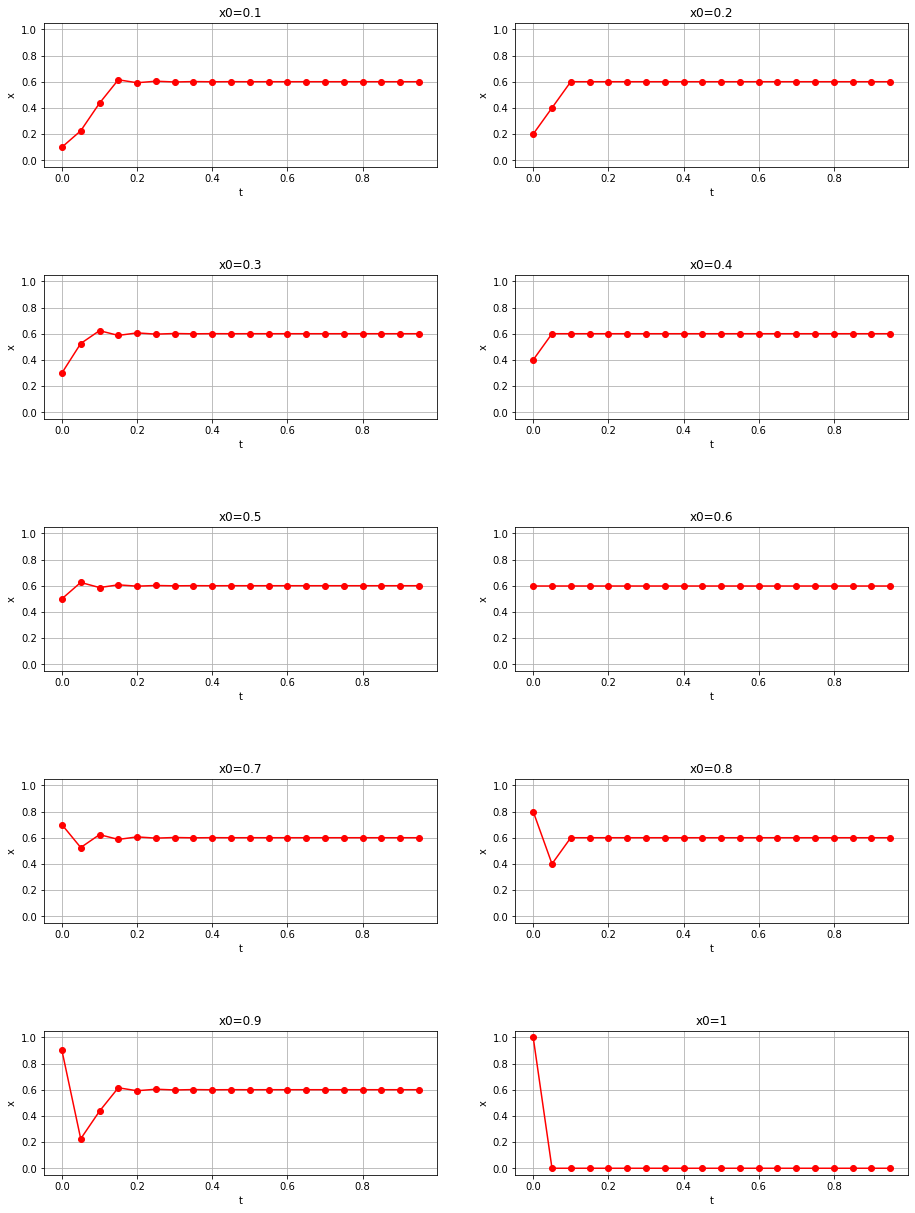

In [3]:
def x_sig(a,x0):
  x_sig=a*x0*(1-x0)
  return x_sig


a=2.5
x0=np.arange(0.1,1.1,0.1)
tspan=np.arange(0,1,0.05)
Tit=['x0=0.1','x0=0.2','x0=0.3','x0=0.4','x0=0.5','x0=0.6','x0=0.7','x0=0.8','x0=0.9','x0=1',]
i=0

while i<len(x0):

  X=[]
  X.append(x0[i])
  h=0
  b=x0[i]

  while h<len(tspan)-1:

    x=x_sig(a,b)
    X.append(x)
    b=x
    h+=1
  
  plt.subplot(5,2,1+i)
  plt.plot(tspan,X,'-or')
  plt.title(Tit[i])
  plt.xlabel('t')
  plt.ylabel('x')
  plt.ylim(-0.05,1.05)
  plt.subplots_adjust(1,2,3,6,0.2,0.75)
  plt.grid()

  i+=1
plt.show()

En las anteriores gráficas, se observa que para $0 < x_n < 1$, con el tiempo el valor de la población tiende a un equilibrio en $x=0.6$ (excepto para $x_0=1$ donde la población se extingue). Pero ¿qué sucede al variar el parámetro $\lambda$? Manteniendo la población inicial constante en $x=0.5$ y variando $\lambda$ obtenemos las siguientes gráficas:

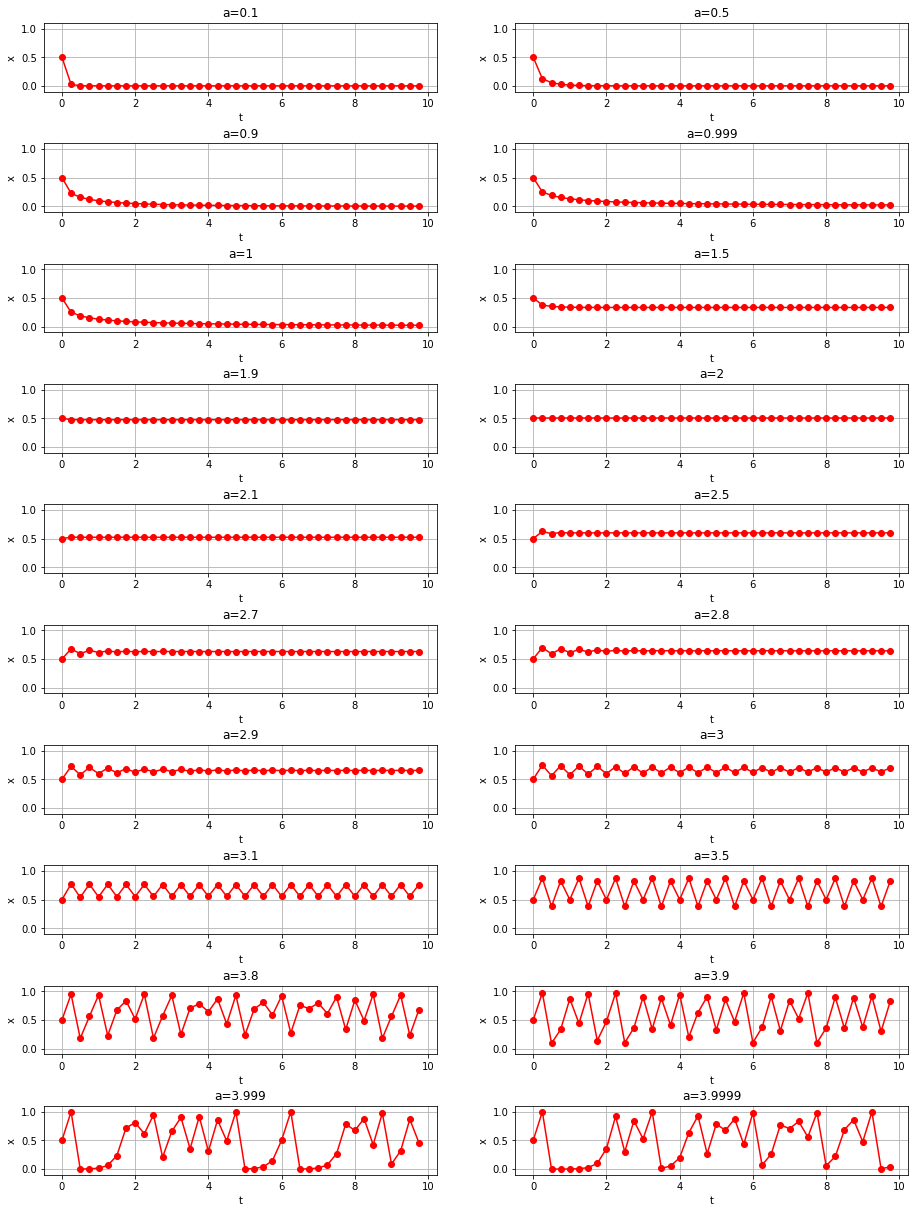

[0.1, 0.5, 0.9, 0.999, 1, 1.5, 1.9, 2, 2.1, 2.5, 2.7, 2.8, 2.9, 3, 3.1, 3.5, 3.8, 3.9, 3.999, 3.9999]
10.0


In [ ]:
def x_sig(a,x0):
  x_sig=a*x0*(1-x0)
  return x_sig


a=[0.1,0.5,0.9,0.999,1,1.5,1.9,2,2.1,2.5,2.7,2.8,2.9,3,3.1,3.5,3.8,3.9,3.999,3.9999]
tspan=np.arange(0,10,0.25)
Tit=['a=0.1','a=0.5','a=0.9','a=0.999','a=1','a=1.5','a=1.9','a=2','a=2.1','a=2.5',
     'a=2.7','a=2.8','a=2.9','a=3','a=3.1','a=3.5','a=3.8','a=3.9','a=3.999','a=3.9999']
i=0
c=np.ceil(len(a)/2)
while i<len(a):

  x0=0.5
  X=[]
  X.append(x0)
  h=0
  b=x0

  while h<len(tspan)-1:

    x=x_sig(a[i],b)
    X.append(x)
    b=x
    h+=1
  
  plt.subplot(c,2,1+i)
  plt.plot(tspan,X,'-or')
  plt.title(Tit[i])
  plt.xlabel('t')
  plt.ylabel('x')
  plt.ylim(-.1,1.1)
  plt.subplots_adjust(1,2,3,6,0.2,0.75)
  plt.grid()

  i+=1
plt.show()

En las gráficas observamos que cuando $\lambda$ toma valores menores a $1$, la población con el tiempo desaparece o en general para $\lambda < 1$ con el tiempo $x=0$, entre $1$ y antes de ser $3$, $(1 \leq \lambda < 3)$, la población alcanza un sólo equilibrio y una vez que toma el valor de $3$ o un valor superior hasta $3.47$ $(3 \leq \lambda \leq 3.47)$ $x$ oscila entre 2 valores y esto es conocido como una bifurcación, al tomar valores superiores empieza a oscilar entre 4 estados, 8 estados, 16 estados y así sucesivamente siendo un comportamiento periódico. Más adelante al seguir aumentando el valor de $\lambda$ se empieza a observar un comportamiento caótico, no convergente y no periódico y esta región se conoce como régimen caótico. Aún así hay ciertos momentos de periodicidad, esto es conocido como intermitencia. La mejor manera de estudiar el comportamiento de esta ecuación o del sistema descrito por esta, es realizando la gráfica de el valor de $x$ vs el valor de $\lambda$, dicha gráfica se conoce como diagrama de bifurcación y en el caso de la ecuación logística es el siguiente.  


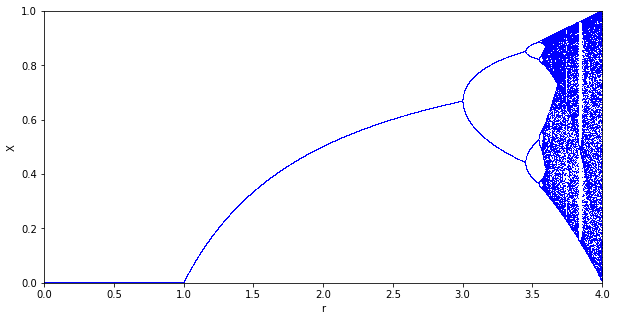

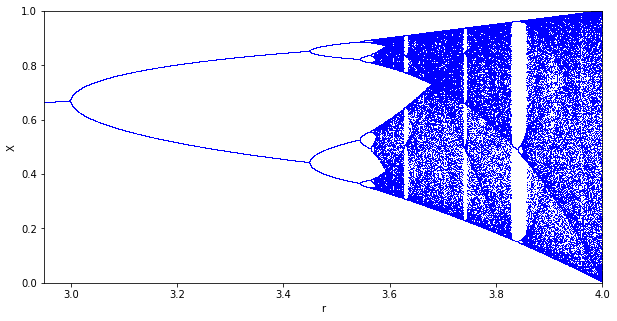

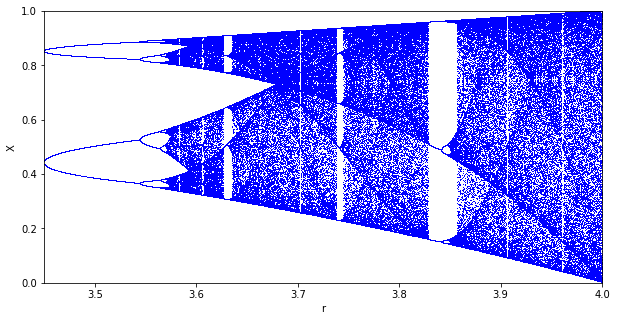

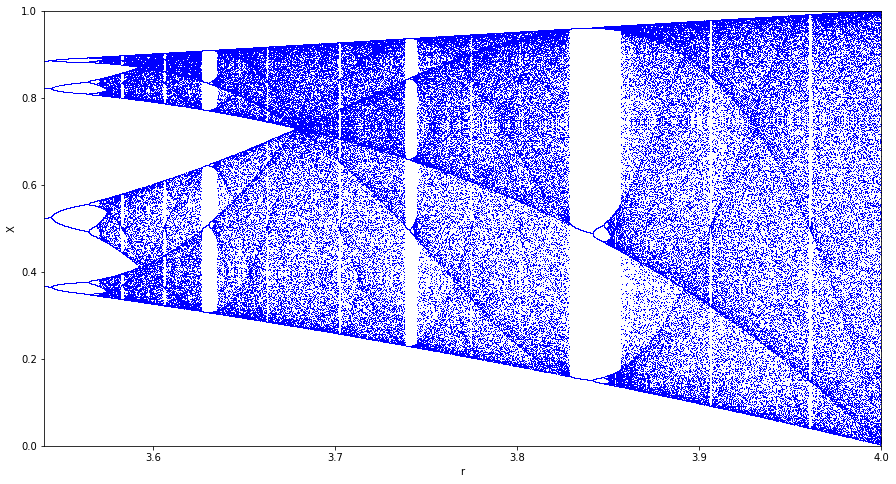

In [ ]:
def EcLog(r,x):
  X=r*x*(1-x)
  return X

def bifurcacion(seed, n_skip, n_iter, step=0.0001, r_min=0):

    R = []

    X = []
    
    r_rang = np.linspace(r_min, 4, int(1/step))

    for r in r_rang:
        x = seed;

        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = EcLog(r,x);
  
    plt.plot(R, X,'b', ls='', marker=',')
    plt.ylim(0, 1)
    plt.xlim(r_min, 4)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()

plt.rcParams["figure.figsize"]=(10,5)
bifurcacion(0.2, 1000, 20)
bifurcacion(0.2, 1000, 20, r_min=2.95)
bifurcacion(0.2, 1000, 20, r_min=3.45)
plt.rcParams["figure.figsize"]=(15,8)
bifurcacion(0.2, 1000, 20, r_min=3.54)

Continuando con la implementación del circuito, para la mayoría de multiplicadores análogos, tienen un voltaje de entrada de 0-10V,  por lo que se cambia la ecuación logística para que la escala sea acorde al sistema que se va a analizar y la nueva ecuación es la siguiente:

$X_{k+1}=\frac{\Lambda X_k(10-X_k)}{25}$

$X=10x$

$\Lambda=2.5\lambda$

A continuación está el diagrama de bloques del circuito que se usó para observar el comportamiento de la nueva ecuación logística.

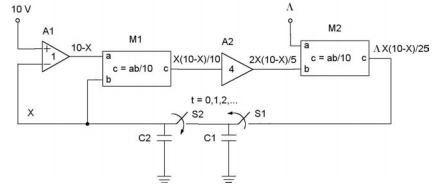

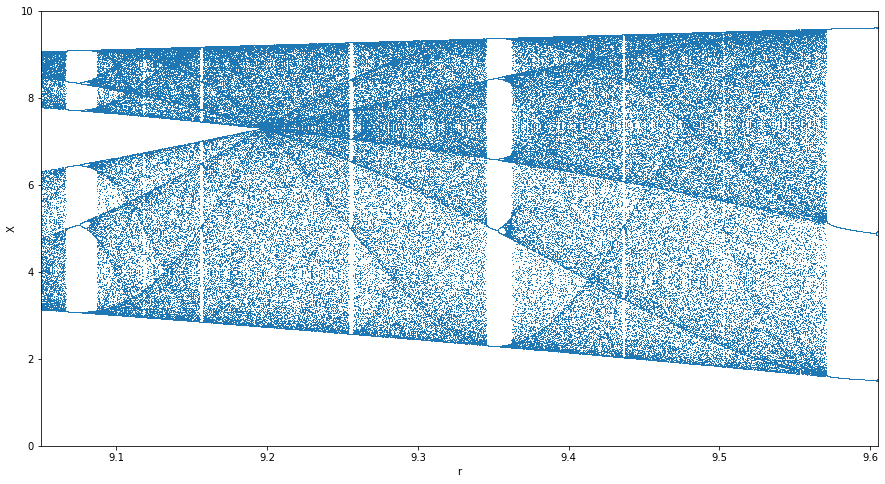

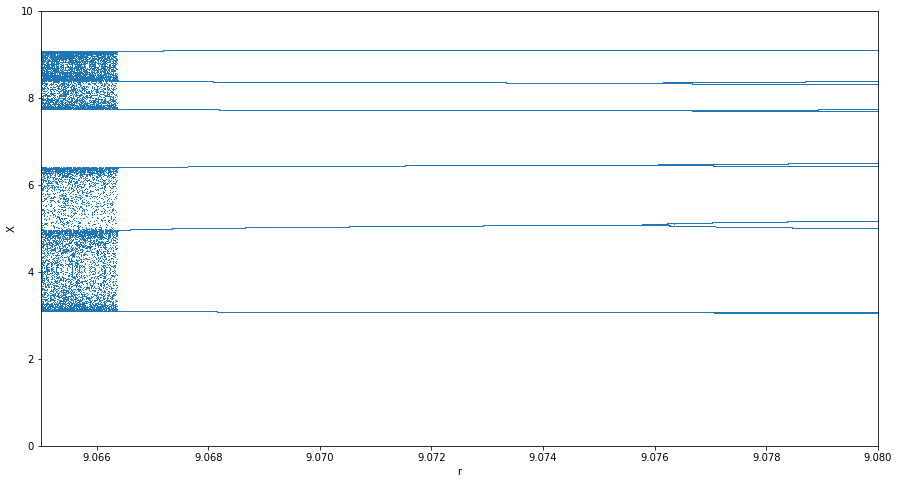

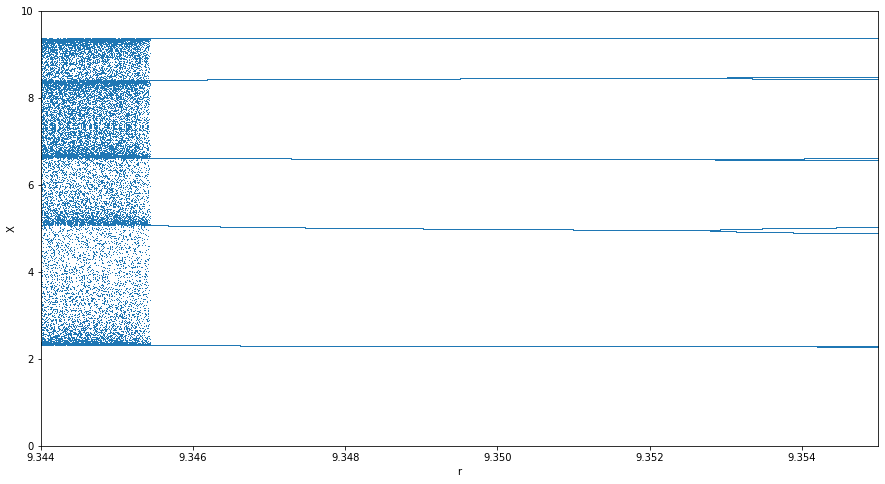

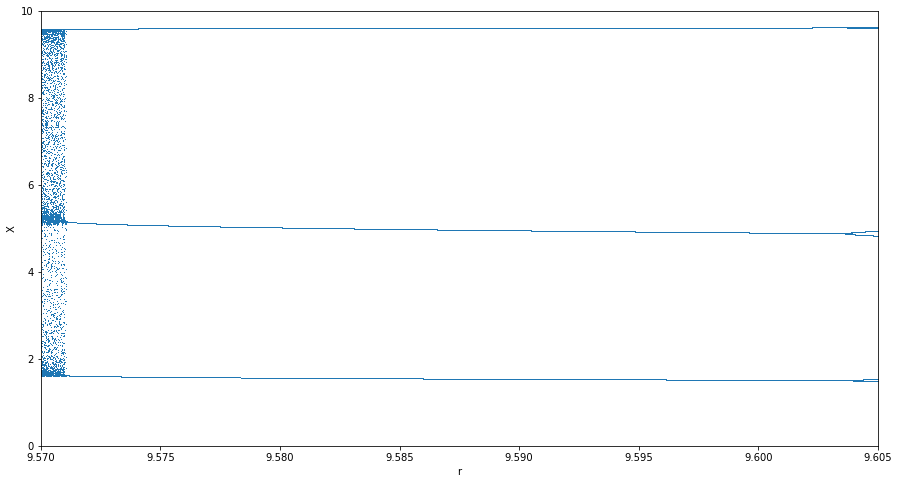

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def logistic_eq(r,x):
  X=r*x*(10-x)/25
  return X


def bifurcacion(seed, n_skip, n_iter, step=0.0001, r_min=0, r_max=10):

    R = []

    X = []
    
    r_rang = np.linspace(r_min, r_max, int(1/step))

    for r in r_rang:
        x = seed;

        for i in range(n_iter+n_skip+1):
            if i >= n_skip:
                R.append(r)
                X.append(x)
                
            x = logistic_eq(r,x);

    plt.plot(R, X, ls='', marker=',')
    plt.ylim(0, 10)
    plt.xlim(r_min, r_max)
    plt.xlabel('r')
    plt.ylabel('X')
    plt.show()


bifurcacion(0.2, 1000, 20, r_min=9.05, r_max=9.605)
bifurcacion(0.2, 1000, 20, r_min=9.065, r_max=9.08)
bifurcacion(0.2, 1000, 20, r_min=9.344, r_max=9.355)
bifurcacion(0.2, 1000, 20, r_min=9.57, r_max=9.605)

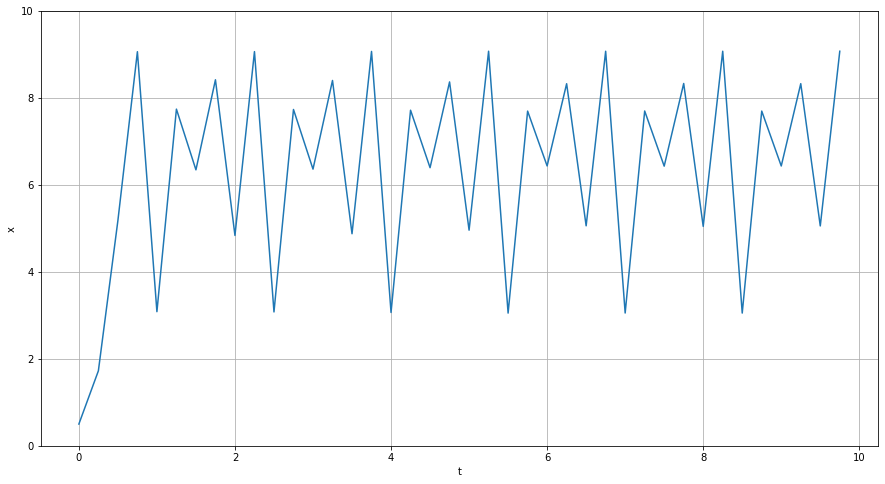

In [ ]:
def x_sig(a,x0):
  x_sig=a*x0*(10-x0)/25
  return x_sig


a=np.linspace(9.066,9.074,100)
tspan=np.arange(0,10,0.25)

i=0
c=np.ceil(len(a)/2)
while i<len(a):

  x0=0.5
  X=[]
  X.append(x0)
  h=0
  b=x0

  while h<len(tspan)-1:

    x=x_sig(a[i],b)
    X.append(x)
    b=x
    h+=1
  i+=1
plt.plot(tspan,X)
plt.xlabel('t')
plt.ylabel('x')
plt.ylim(0,10)
plt.grid()

  
plt.show()